In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D #ing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = "C:\\Users\\bnbsk\\Desktop\\data\\train"
validation_dir = "C:\\Users\\bnbsk\\Desktop\\data\\validation"
train_corgi_dir = os.path.join(train_dir, 'corgi')
train_shiba_dir = os.path.join(train_dir, 'shiba')
validation_corgi_dir = os.path.join(validation_dir, 'corgi')
validation_shiba_dir = os.path.join(validation_dir, 'shiba')

num_corgi_tr = len(os.listdir(train_corgi_dir))
num_shiba_tr = len(os.listdir(train_shiba_dir))
num_corgi_val = len(os.listdir(validation_corgi_dir))
num_shiba_val = len(os.listdir(validation_shiba_dir))
total_train = num_corgi_tr + num_shiba_tr
total_val = num_corgi_tr + num_shiba_tr

batch_size = 100
epochs = 15
IMG_HEIGHT = 128
IMG_WIDTH = 128

In [4]:
train_image_generator = ImageDataGenerator(rescale=1./255,  horizontal_flip=True, rotation_range=45, \
        width_shift_range=.15, height_shift_range=.15, zoom_range=0.5)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, \
    directory=train_dir, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='categorical')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size, \
    directory=validation_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='categorical')

Found 802 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [5]:
inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
x = MaxPool2D()(x)
x = Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = MaxPool2D()(x)
x = Flatten()(x)
x = Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
outputs = Dense(2, activation='softmax')(x)
model = Model(inputs, outputs)
model.summary()
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), \
    metrics=[tf.keras.metrics.CategoricalAccuracy()])#from_logits=True

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                104860

In [6]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
8/8 [==============================] - 34s 4s/step - loss: 1.1748 - categorical_accuracy: 0.5228 - val_loss: 0.7812 - val_categorical_accuracy: 0.5050
Epoch 2/15
8/8 [==============================] - 35s 4s/step - loss: 0.7691 - categorical_accuracy: 0.5157 - val_loss: 0.7665 - val_categorical_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 33s 4s/step - loss: 0.7632 - categorical_accuracy: 0.4986 - val_loss: 0.7621 - val_categorical_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 33s 4s/step - loss: 0.7552 - categorical_accuracy: 0.5188 - val_loss: 0.7553 - val_categorical_accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 28s 4s/step - loss: 0.7532 - categorical_accuracy: 0.4868 - val_loss: 0.7506 - val_categorical_accuracy: 0.5050
Epoch 6/15
8/8 [==============================] - 32s 4s/step - loss: 0.7490 - categorical_accur

In [7]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

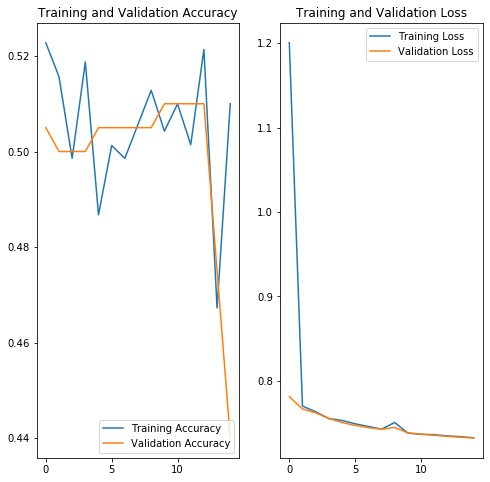

In [8]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
from tensorflow.keras.preprocessing import image

for i in range(20):
    image_path = '/home/administrator/桌面/visualize-ai3/多的分類/wat/a{}.jpg'.format(i)
    img = image.load_img(image_path, target_size=(128, 128))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    print('Predicted:', preds)

Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]
Predicted: [[0. 1. 0.]]


In [21]:
model.save("./model/CNN_model.h5")

In [ ]:
for layer in model.layers:
    print(layer.trainable)
tf.test.is_gpu_available()
#print(model.layers, type(model.layers))